# Introduction

    Cannabis, also known as marijuana among other names,[n 1] is a psychoactive drug from the Cannabis plant intended for  medical or recreational use. The main psychoactive part of cannabis is tetrahydrocannabinol (THC); one of 483 known compounds in the plant, including at least 65 other cannabinoids. Cannabis can be used by smoking, vaporizing, within food, or as an extract.

    Cannabis is often used for its mental and physical effects, such as a "high" or "stoned" feeling, a general change in perception, euphoria (heightened mood), and an increase in appetite.Onset of effects is within minutes when smoked, and about 30 to 60 minutes when cooked and eaten.They last for between two and six hours. Short-term side effects may include a decrease in short-term memory, dry mouth, impaired motor skills, red eyes, and feelings of paranoia or anxiety. Long-term side effects may include addiction, decreased mental ability in those who started as teenagers, and behavioral problems in children whose mothers used cannabis during pregnancy. Studies have found a strong relation between cannabis use and the risk of psychosis,though the cause-and-effect relationship is debated.

# Understanding Data

    Are the Species distribuition of our dataset equal?

    The all types of strains have the same rating distribuition?

    Whats the first word in description to each species? 

    Are the Flavor important to the rating ?

    Are the Effect important to the rating? 

    Are some difference in Effects and Flavors related by specie? 
    
    Are the price affect to Type Distribution?

# Librarys and import

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
import math

import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import plotly
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf


import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # to plot graphs with gggplot2 style

In [2]:
strains = pd.read_csv('strains_preprocessing.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
total = strains.isnull().sum().sort_values(ascending=False)
percent = (strains.isnull().sum()/strains.isnull().count().sort_values(ascending=False))
missing_data = pd.concat([total, percent], axis=1, keys=('Total Percent').split())
missing_data

,Total,Percent
Ammonia,0,0.0
Apple,0,0.0
Apricot,0,0.0
Aroused,0,0.0
Berry,0,0.0
Blue,0,0.0
Blueberry,0,0.0
Butter,0,0.0
Cheese,0,0.0
Chemical,0,0.0


In [4]:
strains.head()

,Strain,Type,Rating,Effects,Flavor,Description,Price,Effects1,Effects2,Effects3,Effects4,Effects5,Flavor1,Flavor2,Flavor3,Aroused,Creative,Dry,Energetic,Euphoric,Focused,Giggly,Happy,Hungry,None,Relaxed,Sleepy,Talkative,Tingly,Uplifted,Ammonia,Apple,Apricot,Berry,Blue,Blueberry,Butter,Cheese,Chemical,Chestnut,Citrus,Coffee,Diesel,Earthy,Flowery,Fruit,Grape,Grapefruit,Honey,Lavender,Lemon,Lime,Mango,Menthol,Mint,Minty,None.1,Nutty,Orange,Peach,Pear,Pepper,Pine,Pineapple,Pungent,Rose,Sage,Skunk,Spicy/Herbal,Strawberry,Sweet,Tar,Tea,Tobacco,Tree,Tropical,Vanilla,Violet,Woody
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,109,Creative,Energetic,Tingly,Euphoric,Relaxed,Earthy,Sweet,Citrus,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...,31,Relaxed,Aroused,Creative,Happy,Energetic,Flowery,Violet,Diesel,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...,391,Uplifted,Happy,Relaxed,Energetic,Creative,Spicy/Herbal,Sage,Woody,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...,38,Tingly,Creative,Hungry,Relaxed,Uplifted,Apricot,Citrus,Grapefruit,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%...",178,Happy,Relaxed,Euphoric,Uplifted,Talkative,Citrus,Earthy,Orange,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
dfDescribe=pd.DataFrame(columns='dataFeatures dataType null nullPct unique uniqueSample'.split(),
                        data=[[col, strains.dtypes[col], 
                               sum(strains[col].isna()),
                               round(100*sum(strains[col].isna())/len(strains[col]),2),
                               strains[col].nunique(),
                               list((strains[col].unique()[:]))]for col in strains.columns])
                                                                  
dfDescribe

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Strain,object,0,0.0,2350,"[100-Og, 98-White-Widow, 1024, 13-Dawgs, 24K-G..."
1,Type,object,0,0.0,3,"[hybrid, sativa, indica]"
2,Rating,float64,0,0.0,26,"[4.0, 4.7, 4.4, 4.2, 4.6, 0.0, 4.5, 4.3, 5.0, ..."
3,Effects,object,0,0.0,1655,"[Creative,Energetic,Tingly,Euphoric,Relaxed, R..."
4,Flavor,object,0,0.0,1293,"[Earthy,Sweet,Citrus, Flowery,Violet,Diesel, S..."
5,Description,object,0,0.0,2312,[$100 OG is a 50/50 hybrid strain that packs a...
6,Price,int64,0,0.0,658,"[109, 31, 391, 38, 178, 337, 52, 536, 509, 577..."
7,Effects1,object,0,0.0,15,"[Creative, Relaxed, Uplifted, Tingly, Happy, N..."
8,Effects2,object,0,0.0,15,"[Energetic, Aroused, Happy, Creative, Relaxed,..."
9,Effects3,object,0,0.0,14,"[Tingly, Creative, Relaxed, Hungry, Euphoric, ..."


In [6]:
len(strains.columns)

79

# EDA

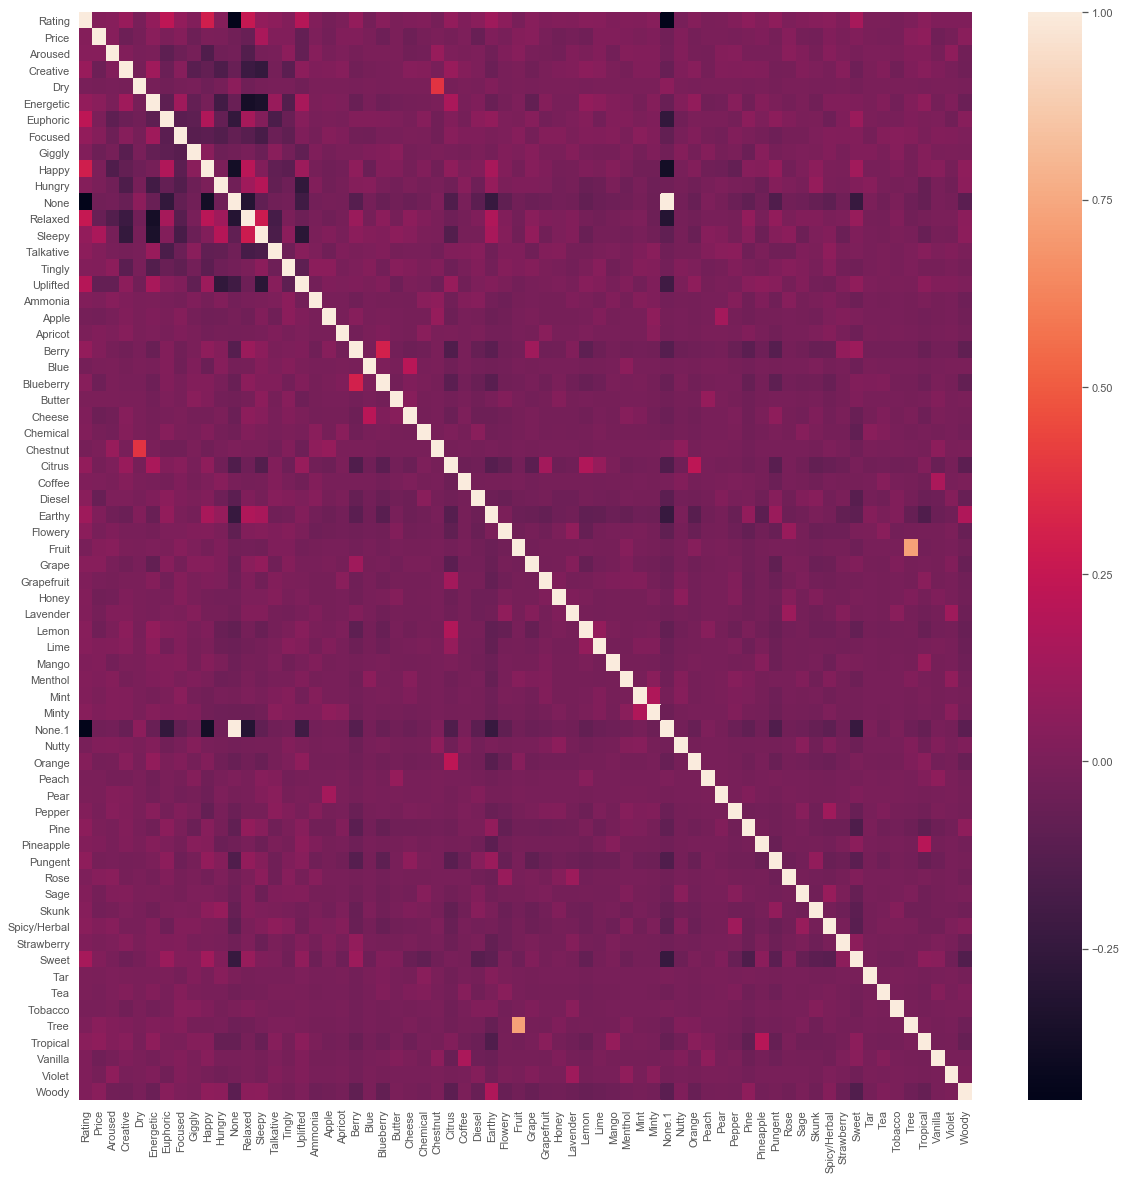

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(strains.corr())

In [8]:
app_category = strains['Type'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = app_category.index,
        values = app_category.values,
        hoverinfo = 'label+value'
    
)]

layout = go.Layout(
                   title='Type Distribution'
                   )

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='Type Distribution')




In [9]:
app_category = strains['Rating'].value_counts().sort_values(ascending=True)

data = [go.Pie(
        labels = app_category.index,
        values = app_category.values,
        hoverinfo = 'label+value'
        
    
)]

layout = go.Layout(
                   title='Rating Distribution'
                   )

fig = go.Figure(data=data, layout=layout)

plotly.offline.iplot(fig, filename='Rating Distribution')

Top 10 Rating by consumers
4.5    317
4.3    297
4.4    284
4.6    242
4.2    225
5.0    210
4.7    164
4.8    159
4.0    104
4.1    101
Name: Rating, dtype: int64


Text(0.5,0,'Rating')

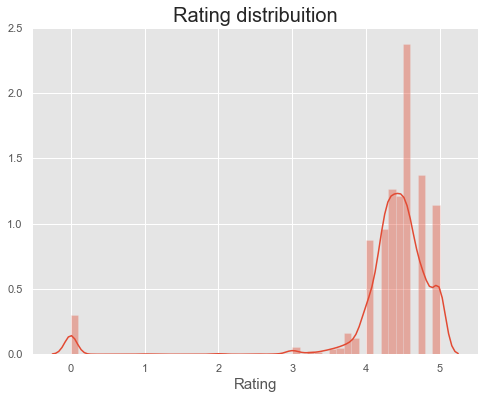

In [10]:
print("Top 10 Rating by consumers")
print(strains["Rating"].value_counts().head(10))

plt.figure(figsize=(8,6))

#Total rating distribuition
g = sns.distplot(strains["Rating"], bins=50)
g.set_title("Rating distribuition", size = 20)
g.set_xlabel('Rating', fontsize=15)

Rating Distribuition by Species Type
Type    hybrid  indica  sativa
Rating                        
4.1         56      33      12
4.2        113      64      48
4.3        150      89      58
4.4        144      83      57
4.5        164      94      59
4.6        114      78      50
4.7         95      47      22
4.8         88      41      30
4.9         31      19       9
5.0        102      70      38


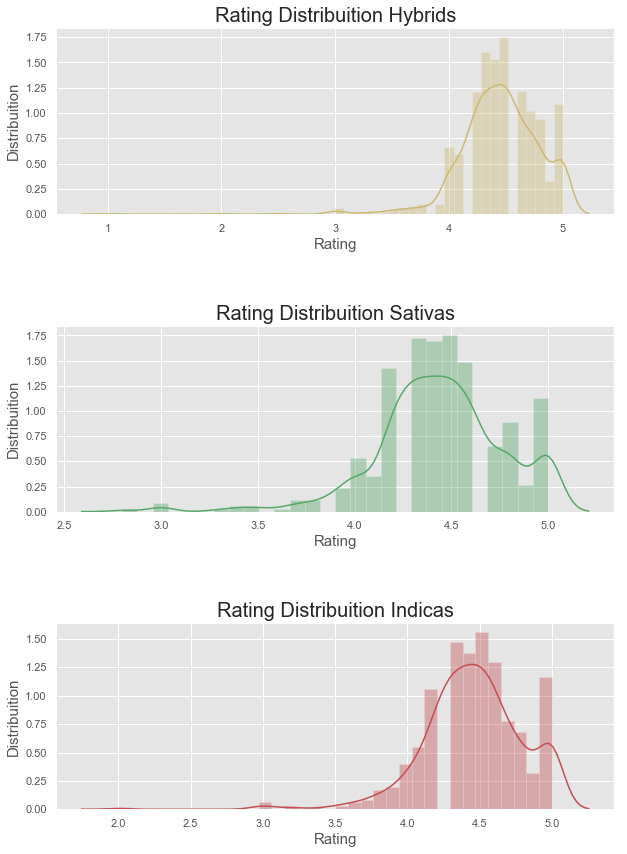

In [11]:
print("Rating Distribuition by Species Type")
print(pd.crosstab(strains[strains.Rating > 4.0]['Rating'], strains.Type))

plt.figure(figsize=(10,14))

#Let's look the Rating distribuition by Type.
g = plt.subplot(311)
g = sns.distplot(strains[(strains.Type == 'hybrid') & 
                               (strains.Rating > 0)]["Rating"], color='y')
g.set_xlabel("Rating", fontsize=15)
g.set_ylabel("Distribuition", fontsize=15)
g.set_title("Rating Distribuition Hybrids", fontsize=20)

g1 = plt.subplot(312)
g1 = sns.distplot(strains[(strains.Type == 'sativa') & 
                               (strains.Rating > 0)]["Rating"], color='g')
g1.set_xlabel("Rating", fontsize=15)
g1.set_ylabel("Distribuition", fontsize=15)
g1.set_title("Rating Distribuition Sativas", fontsize=20)

g2 = plt.subplot(313)
g2 = sns.distplot(strains[(strains.Type == 'indica') & 
                               (strains.Rating > 0)]["Rating"], color='r')
g2.set_xlabel("Rating", fontsize=15)
g2.set_ylabel("Distribuition", fontsize=15)
g2.set_title("Rating Distribuition Indicas", fontsize=20)

plt.subplots_adjust(wspace = 0.1, hspace = 0.6,top = 0.9)

plt.show()


Sativa and Indica have a similar rating distribuition, and we can see that almost of all species in dataset have rating higher than 4

In [12]:
hibridas = strains[strains.Type == 'hybrid']
indicas = strains[strains.Type == 'indica']
sativas = strains[strains.Type == 'sativa']

In [13]:
def get_effects(dataframe):
    ret_dict = {}
    for list_ef in dataframe.Effects:
        effects_list = list_ef.split(',')
        for effect in effects_list:
            if not effect in ret_dict:
                ret_dict[effect] = 1
            else:
                ret_dict[effect] += 1
    return ret_dict

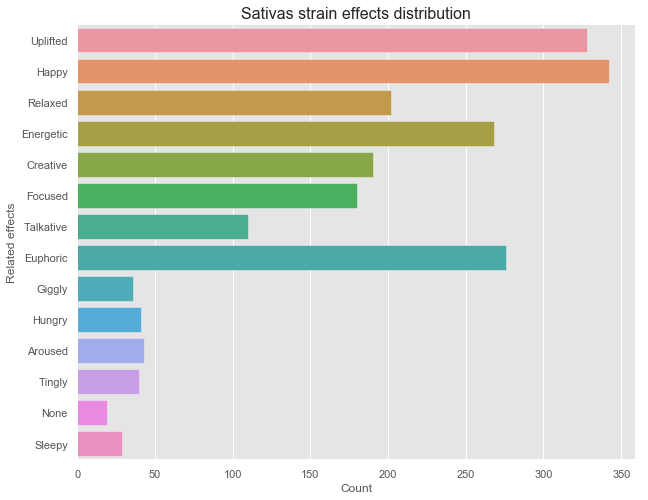

In [14]:
sativa_effects = get_effects(sativas)

plt.figure(figsize=(10,8))
sns.barplot(list(sativa_effects.values()), list(sativa_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Related effects", fontsize=12)
plt.title("Sativas strain effects distribution", fontsize=16)
plt.show()

In [15]:
sativa_effects

{'Uplifted': 328,
 'Happy': 342,
 'Relaxed': 202,
 'Energetic': 268,
 'Creative': 190,
 'Focused': 180,
 'Talkative': 110,
 'Euphoric': 276,
 'Giggly': 36,
 'Hungry': 41,
 'Aroused': 43,
 'Tingly': 40,
 'None': 19,
 'Sleepy': 29}

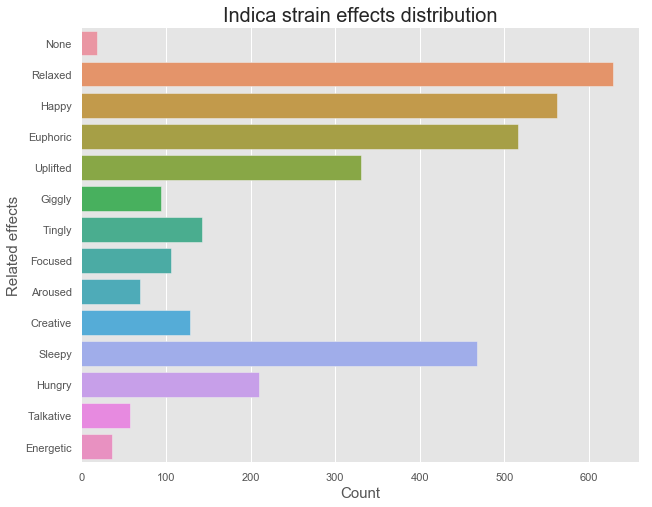

In [16]:
indica_effects = get_effects(indicas)

plt.figure(figsize=(10,8))
sns.barplot(list(indica_effects.values()),list(indica_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Indica strain effects distribution", fontsize=20)
plt.show()

In [17]:
indica_effects

{'None': 19,
 'Relaxed': 628,
 'Happy': 562,
 'Euphoric': 516,
 'Uplifted': 331,
 'Giggly': 94,
 'Tingly': 143,
 'Focused': 106,
 'Aroused': 69,
 'Creative': 128,
 'Sleepy': 468,
 'Hungry': 210,
 'Talkative': 58,
 'Energetic': 36}

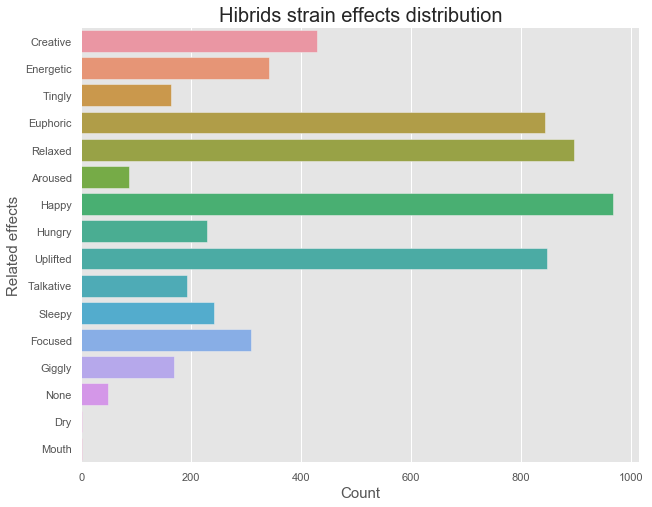

In [18]:
hibridas_effects = get_effects(hibridas)

plt.figure(figsize=(10,8))
sns.barplot(list(hibridas_effects.values()),list(hibridas_effects.keys()), orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Related effects", fontsize=15)
plt.title("Hibrids strain effects distribution", fontsize=20)
plt.show()

In [19]:
hibridas_effects

{'Creative': 429,
 'Energetic': 342,
 'Tingly': 163,
 'Euphoric': 843,
 'Relaxed': 896,
 'Aroused': 87,
 'Happy': 967,
 'Hungry': 228,
 'Uplifted': 848,
 'Talkative': 192,
 'Sleepy': 241,
 'Focused': 309,
 'Giggly': 168,
 'None': 49,
 'Dry': 1,
 'Mouth': 1}

We can clearly see that Happy, Uplified, Relaxed, Euphoric have a high ranking at all 3 types 

Its interesting that almost 350 people of 440 in Sativas related Happy and Uplifted Effects 

'Happy': 342

'Uplifted': 328

'Euphoric': 276

'Energetic': 268

78% has described Happy to Sativas strains

Indicas we have 699 votes and Relaxed with most frequency at distribuition: 

'Relaxed': 628

'Happy': 562

'Euphoric': 516

90% has described Relaxed to Indica strains 

Hybrids We have 1212 votes and distribuition of effects is

'Happy': 967

'Relaxed': 896

'Uplifted': 848

'Euphoric': 843

80% has described Happy and 74% related Relaxed to Hybrids strains 
Very Interesting!

We also need to remember that's possible to vote in more than 1 effect or flavor in each vote.

In [20]:
def flavors(df):
    ret_dict = {}
    for list_ef in df.Flavor.dropna():
        flavors_list = list_ef.split(',')
        for flavor in flavors_list:
            if not flavor in ret_dict:
                ret_dict[flavor] = 1
            else:
                ret_dict[flavor] += 1
    return ret_dict

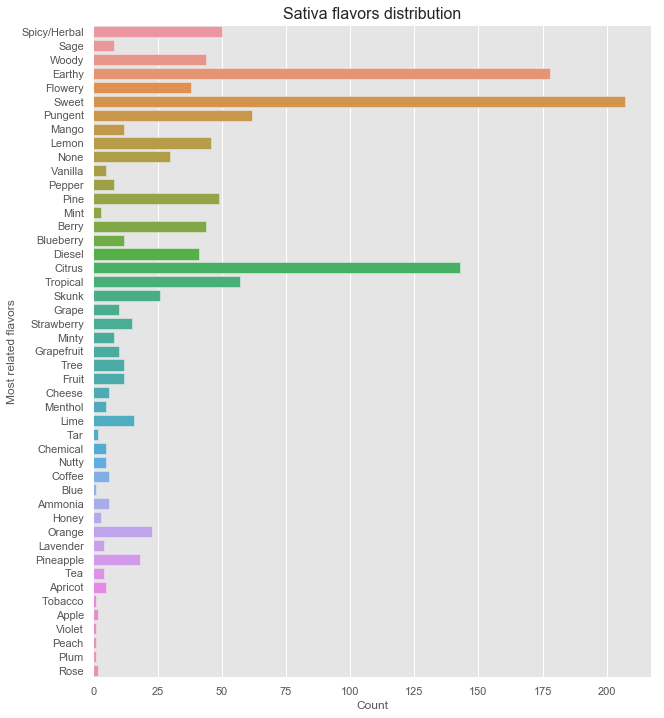

In [21]:
sativa_flavors = flavors(sativas)

plt.figure(figsize=(10,12))
sns.barplot(list(sativa_flavors.values()),list(sativa_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors", fontsize=12)
plt.title("Sativa flavors distribution", fontsize=16)
plt.show()

In [22]:
sativa_flavors

{'Spicy/Herbal': 50,
 'Sage': 8,
 'Woody': 44,
 'Earthy': 178,
 'Flowery': 38,
 'Sweet': 207,
 'Pungent': 62,
 'Mango': 12,
 'Lemon': 46,
 'None': 30,
 'Vanilla': 5,
 'Pepper': 8,
 'Pine': 49,
 'Mint': 3,
 'Berry': 44,
 'Blueberry': 12,
 'Diesel': 41,
 'Citrus': 143,
 'Tropical': 57,
 'Skunk': 26,
 'Grape': 10,
 'Strawberry': 15,
 'Minty': 8,
 'Grapefruit': 10,
 'Tree': 12,
 'Fruit': 12,
 'Cheese': 6,
 'Menthol': 5,
 'Lime': 16,
 'Tar': 2,
 'Chemical': 5,
 'Nutty': 5,
 'Coffee': 6,
 'Blue': 1,
 'Ammonia': 6,
 'Honey': 3,
 'Orange': 23,
 'Lavender': 4,
 'Pineapple': 18,
 'Tea': 4,
 'Apricot': 5,
 'Tobacco': 1,
 'Apple': 2,
 'Violet': 1,
 'Peach': 1,
 'Plum': 1,
 'Rose': 2}

Most frequent flavors in Sativas: 

Sweet: 207 

Earthy: 178 

Citrus: 143 

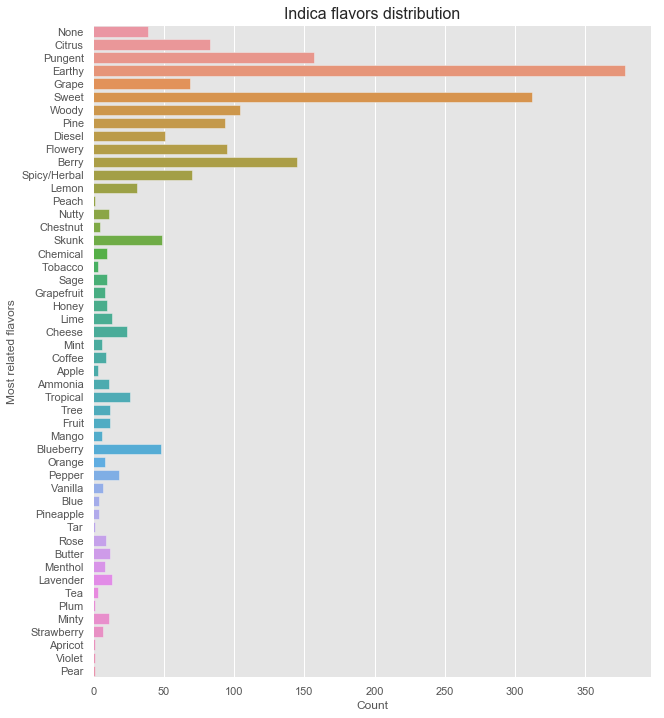

In [23]:
indica_flavors = flavors(indicas)

plt.figure(figsize=(10,12))
sns.barplot(list(indica_flavors.values()),list(indica_flavors.keys()), orient='h')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Most related flavors",fontsize=12)
plt.title("Indica flavors distribution", fontsize=16)
plt.show()

In [24]:
indica_flavors

{'None': 39,
 'Citrus': 83,
 'Pungent': 157,
 'Earthy': 378,
 'Grape': 69,
 'Sweet': 312,
 'Woody': 104,
 'Pine': 94,
 'Diesel': 51,
 'Flowery': 95,
 'Berry': 145,
 'Spicy/Herbal': 70,
 'Lemon': 31,
 'Peach': 1,
 'Nutty': 11,
 'Chestnut': 5,
 'Skunk': 49,
 'Chemical': 10,
 'Tobacco': 3,
 'Sage': 10,
 'Grapefruit': 8,
 'Honey': 10,
 'Lime': 13,
 'Cheese': 24,
 'Mint': 6,
 'Coffee': 9,
 'Apple': 3,
 'Ammonia': 11,
 'Tropical': 26,
 'Tree': 12,
 'Fruit': 12,
 'Mango': 6,
 'Blueberry': 48,
 'Orange': 8,
 'Pepper': 18,
 'Vanilla': 7,
 'Blue': 4,
 'Pineapple': 4,
 'Tar': 1,
 'Rose': 9,
 'Butter': 12,
 'Menthol': 8,
 'Lavender': 13,
 'Tea': 3,
 'Plum': 1,
 'Minty': 11,
 'Strawberry': 7,
 'Apricot': 1,
 'Violet': 1,
 'Pear': 1}

Most frequent values in indicas 

Earthy: 378 
    
Sweet: 312 
    
Pungent: 157 
    
Berry: 145

Text(0.5,1,'Hibrids flavors distribution')

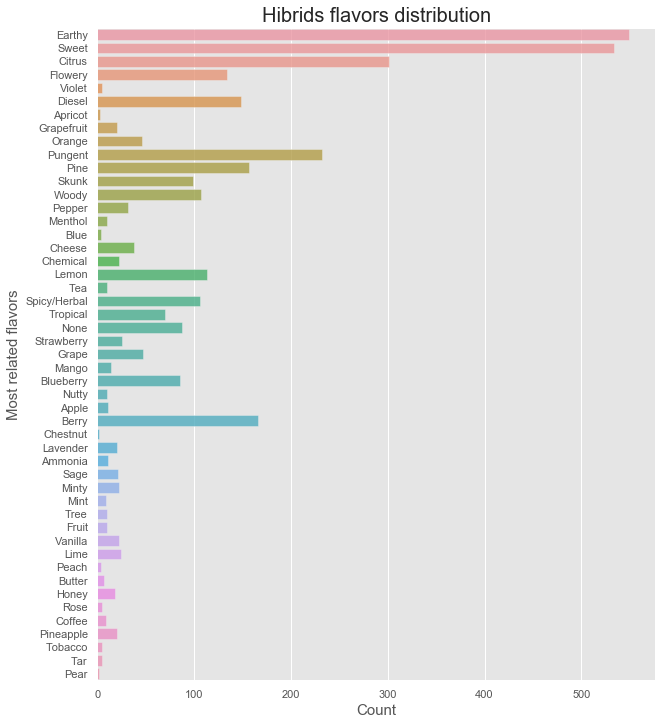

In [25]:
hibridas_flavors = flavors(hibridas)

plt.figure(figsize=(10,12))
sns.barplot(list(hibridas_flavors.values()),list(hibridas_flavors.keys()), alpha=0.8,orient='h')
plt.xlabel("Count", fontsize=15)
plt.ylabel("Most related flavors", fontsize=15)
plt.title("Hibrids flavors distribution", fontsize=20)

In [26]:
hibridas_flavors

{'Earthy': 549,
 'Sweet': 534,
 'Citrus': 301,
 'Flowery': 134,
 'Violet': 5,
 'Diesel': 148,
 'Apricot': 3,
 'Grapefruit': 20,
 'Orange': 46,
 'Pungent': 232,
 'Pine': 157,
 'Skunk': 99,
 'Woody': 107,
 'Pepper': 32,
 'Menthol': 10,
 'Blue': 4,
 'Cheese': 38,
 'Chemical': 22,
 'Lemon': 113,
 'Tea': 10,
 'Spicy/Herbal': 106,
 'Tropical': 70,
 'None': 87,
 'Strawberry': 25,
 'Grape': 47,
 'Mango': 14,
 'Blueberry': 85,
 'Nutty': 10,
 'Apple': 11,
 'Berry': 166,
 'Chestnut': 2,
 'Lavender': 20,
 'Ammonia': 11,
 'Sage': 21,
 'Minty': 22,
 'Mint': 9,
 'Tree': 10,
 'Fruit': 10,
 'Vanilla': 22,
 'Lime': 24,
 'Peach': 4,
 'Butter': 7,
 'Honey': 18,
 'Rose': 5,
 'Coffee': 9,
 'Pineapple': 20,
 'Tobacco': 5,
 'Tar': 5,
 'Pear': 2}

The most frequent values in Hybrid type is: 
    
Earthy: 549
    
Sweet: 534
    
Citrus: 301 

# Worldcloud NLTK

In [27]:
from wordcloud import WordCloud, STOPWORDS
import nltk.tokenize as word_tokenize
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import re
from nltk.stem.porter import *
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction import stop_words

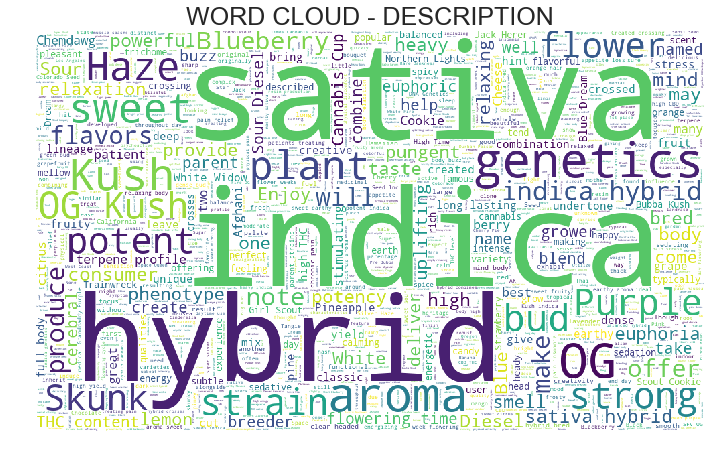

In [28]:
stopwords1 = set(STOPWORDS)
newStopWords1 = ['strain','effect', 'genetic', 'effects','flavor',
                'dominant','known','cross']
stopwords1.update(newStopWords1)

wordcloud1 = WordCloud(
                          background_color='white',
                          stopwords=stopwords1,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud1)
plt.title("WORD CLOUD - DESCRIPTION", fontsize=25)
plt.axis('off')
plt.show()

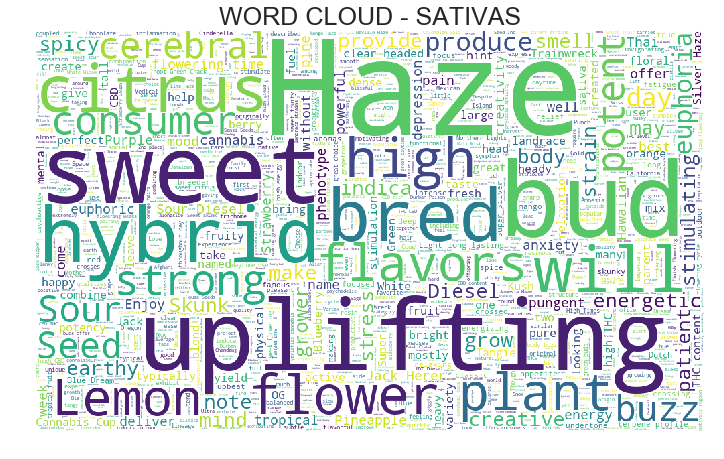

In [29]:
stopwords2 = set(STOPWORDS)
newStopWords2 = ['strain','effect', 'genetic', 'sativa', 'effects',
                'aroma','flavor','dominant','known','cross','genetics']
stopwords2.update(newStopWords2)

wordcloud2 = WordCloud(
                          background_color='white',
                          stopwords=stopwords2,
                          max_words=1500,
                          max_font_size=200, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'sativa']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud2)
plt.title("WORD CLOUD - SATIVAS", fontsize=25)
plt.axis('off')
plt.show()

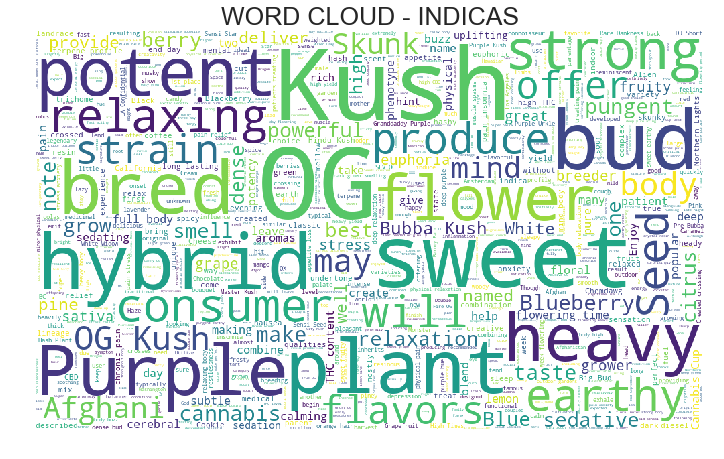

In [30]:
stopwords3 = set(STOPWORDS)
newStopWords3 = ['strain','effect', 'genetic', 'indica', 'effects','aroma', 
                'genetics','flavor','dominant','known','cross']
stopwords3.update(newStopWords3)

wordcloud3 = WordCloud(
                          background_color='white',
                          stopwords=stopwords3,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'indica']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud3)
plt.title("WORD CLOUD - INDICAS", fontsize=25)
plt.axis('off')
plt.show()

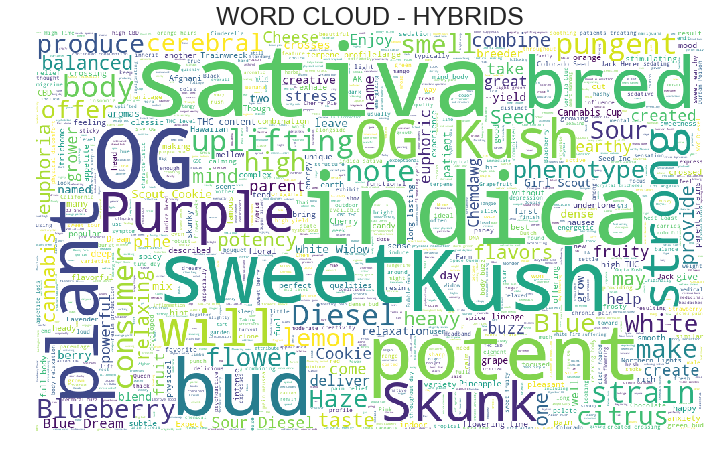

In [31]:
stopwords4 = set(STOPWORDS)
newStopWords4 = ['strain','effect', 'genetic', 'hybrid', 'effects', 'aroma',
                'genetics', 'flavor', 'genetics','cross','dominant','known']
stopwords4.update(newStopWords4)

wordcloud4 = WordCloud(
                          background_color='white',
                          stopwords=stopwords4,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Type == 'hybrid']['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud4)
plt.title("WORD CLOUD - HYBRIDS", fontsize=25)
plt.axis('off')
plt.show()

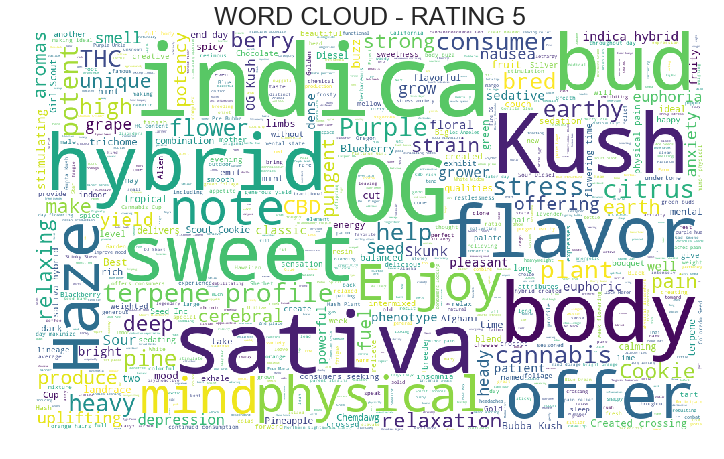

In [32]:
stopwords5 = set(STOPWORDS)
newStopWords5 = ['strain','effect', 'genetic','effects','cross','genetics',
                'aroma','consumer','known','dominant']
stopwords5.update(newStopWords5)

wordcloud5 = WordCloud(
                          background_color='white',
                          stopwords=stopwords5,
                          max_words=1500,
                          max_font_size=150, 
                          width=1000, height=600,
                          random_state=42,
                         ).generate(" ".join(strains[strains.Rating == 5]['Description'].astype(str)))

fig = plt.figure(figsize = (12,12))
plt.imshow(wordcloud5)
plt.title("WORD CLOUD - RATING 5", fontsize=25)
plt.axis('off')
plt.show()

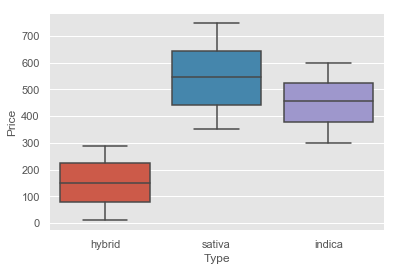

In [33]:
sns.boxplot(x="Type", y="Price", data=strains)